Install Neural Prophet

In [ ]:
pip install neuralprophet

Import the relevant libraries

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot
from pandas import to_datetime
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

Import the monthly car sales dataset

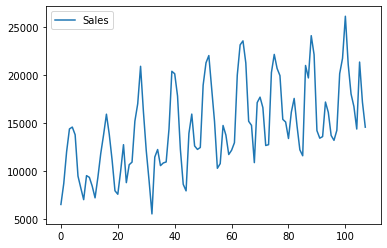

In [ ]:
data_location = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/"
df = pd.read_csv(data_location + "monthly-car-sales.csv")
df.plot()
pyplot.show()

Change column names and format month as datetime

In [ ]:
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

Split into train and test datasets

In [ ]:
train = df.drop(df.index[-12:])
test = df.tail(12)

Fit the Neural Prophet model on training dataset

In [ ]:
m = NeuralProphet()
metrics = m.fit(train, freq='MS')

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Plot model parameters

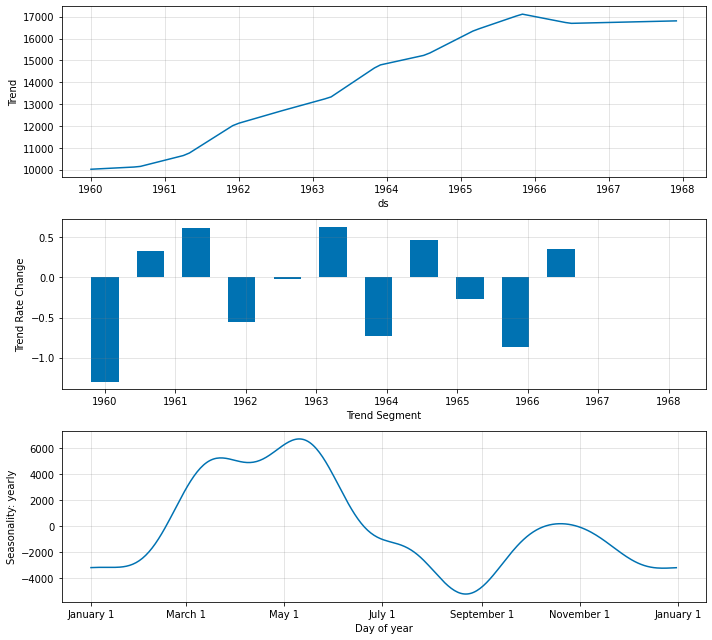

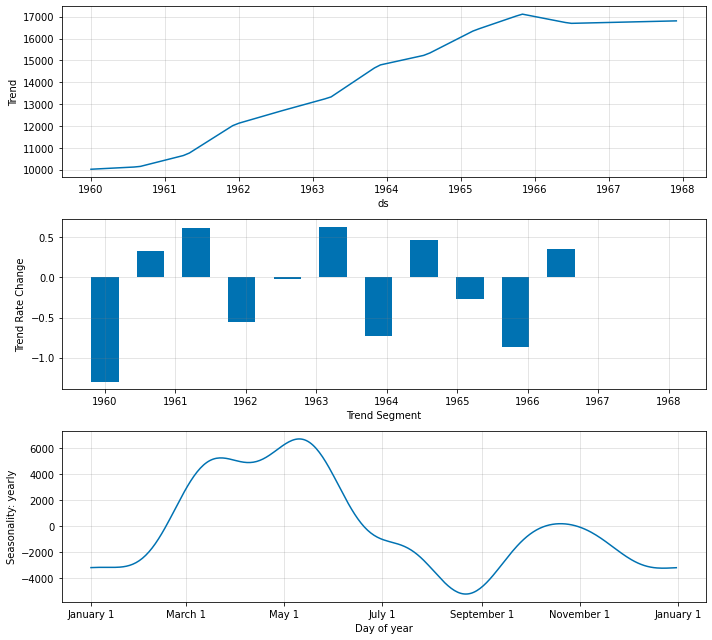

In [ ]:
m.plot_parameters()

Test on testing dataset



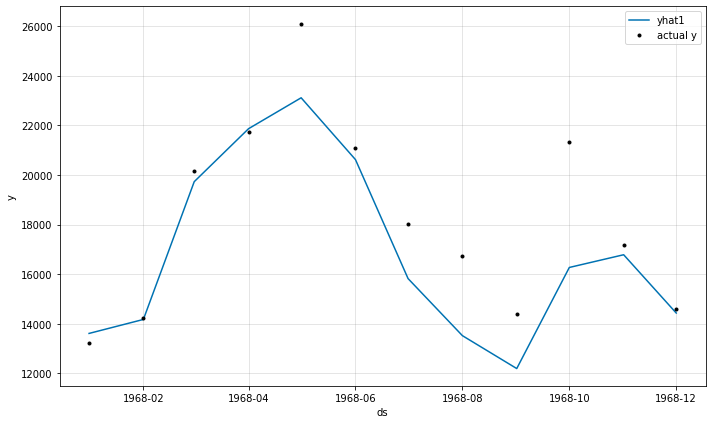

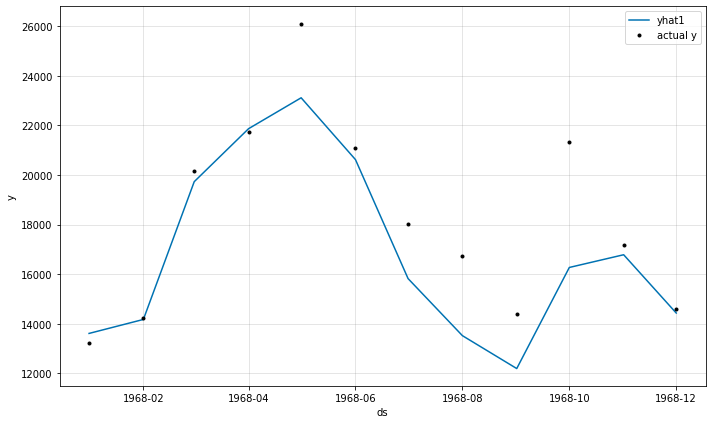

In [ ]:
forecast = m.predict(test)
m.plot(forecast)

Calculate metrics

In [ ]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,1968-01-01,13210,13609.388672,399.388672,16814.017578,-3204.629639
1,1968-02-01,14251,14173.128906,-77.871094,16820.777344,-2647.646973
2,1968-03-01,20139,19727.664062,-411.335938,16827.097656,2900.566650
3,1968-04-01,21725,21863.347656,138.347656,16833.855469,5029.491211
4,1968-05-01,26099,23109.673828,-2989.326172,16840.398438,6269.277832
5,1968-06-01,21084,20616.683594,-467.316406,16847.156250,3769.528320
6,1968-07-01,18024,15820.290039,-2203.709961,16853.695312,-1033.405396
7,1968-08-01,16722,13519.500000,-3202.500000,16860.453125,-3340.952881
8,1968-09-01,14385,12192.922852,-2192.077148,16867.210938,-4674.288574
9,1968-10-01,21342,16268.913086,-5073.086914,16873.751953,-604.838501


In [ ]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat1'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = (mean_absolute_percentage_error(y_true, y_pred) * 100)
print('MAPE: %.3f' % mape, '%')

MAE: 1474.959
MAPE: 7.802 %


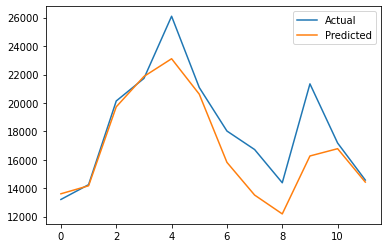

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()